In [ ]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 29: Least Squares

In [38]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

### Discussion Question ###

Midterm: Average 70, SD 10
Final:   Average 50, SD 12
r = 0.75

a) Estimate the average final exam score for those who got 90 on the midterm.

b) Estimate the average final exam score for those who got 60 on the midterm.

### Regression Line ###

In [39]:
def standard_units(w):
    return (w - np.average(w))/np.std(w)  

# t is a table; x and y are column labels

def correlation(t, x, y):
    return np.average(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(t, x, y):
    r = correlation(t, x, y)
    return r * np.std(t.column(y))/np.std(t.column(x))

def intercept(t, x, y):
    a = slope(t, x, y)
    return np.average(t.column(y)) - a * np.average(t.column(x))

In [40]:
def fitted_values(t, x, y):
    """Return an array of the regressions estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

In [41]:
little_women = Table.read_table('little_women.csv')
little_women = little_women.move_to_start('Periods')
little_women

Periods,Characters
189,21759
188,22148
231,20558
195,25526
255,23395
140,14622
131,14431
214,22476
337,33767
185,18508


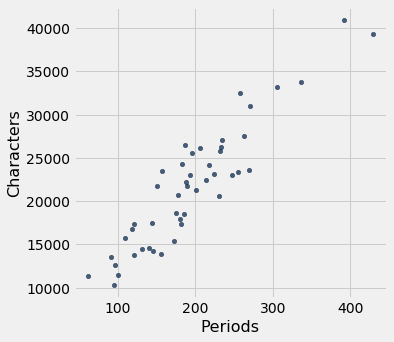

In [42]:
little_women.scatter('Periods', 'Characters')

In [43]:
correlation(little_women, 'Periods', 'Characters')

0.9229576895854816

In [44]:
predicted = fitted_values(little_women, 'Periods', 'Characters')

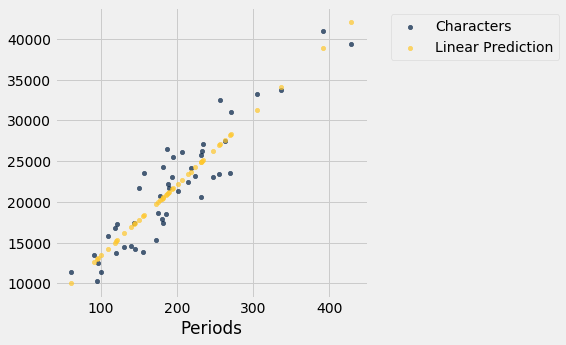

In [45]:
lw_with_predictions = little_women.with_column('Linear Prediction', predicted)
lw_with_predictions.scatter('Periods')

In [46]:
actual = little_women.column('Characters')
errors = actual - predicted

In [47]:
lw_with_predictions.with_column('Error', errors)

Periods,Characters,Linear Prediction,Error
189,21759,21183.6,575.403
188,22148,21096.6,1051.38
231,20558,24836.7,-4278.67
195,25526,21705.5,3820.54
255,23395,26924.1,-3529.13
140,14622,16921.7,-2299.68
131,14431,16138.9,-1707.88
214,22476,23358,-882.043
337,33767,34056.3,-289.317
185,18508,20835.7,-2327.69


In [48]:
np.mean(errors ** 2) ** 0.5

2701.690785311856

In [49]:
lw_reg_slope = slope(little_women, 'Periods', 'Characters')
lw_reg_intercept = intercept(little_women, 'Periods', 'Characters')

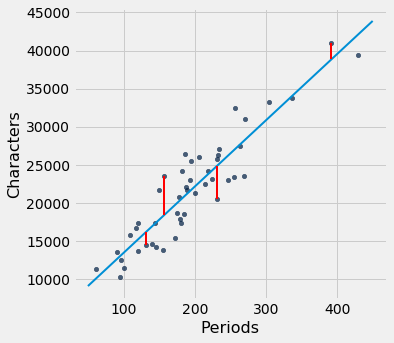

In [50]:
lw_errors(lw_reg_slope, lw_reg_intercept)

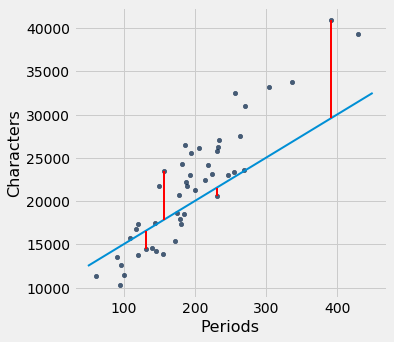

In [51]:
# takes any slope, any intercept

lw_errors(50, 10000)

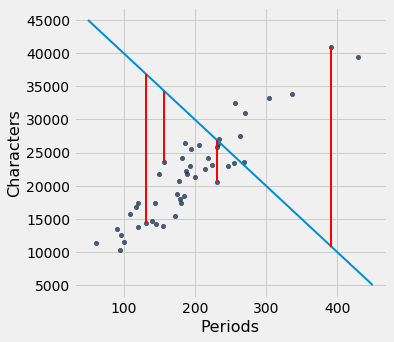

In [52]:
lw_errors(-100, 50000)

### Root Mean Square Error ###

In [53]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    prediction = slope * x + intercept
    mse = np.mean((y - prediction) ** 2)
    print("Root mean squared error:", mse ** 0.5)

Root mean squared error: 4322.167831766537


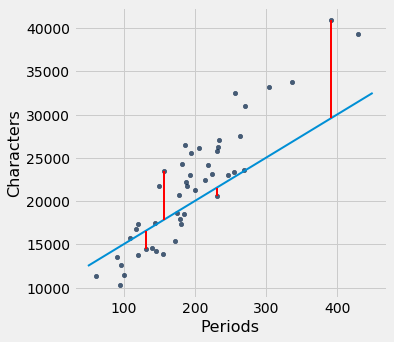

In [54]:
lw_rmse(50, 10000)

Root mean squared error: 16710.11983735375


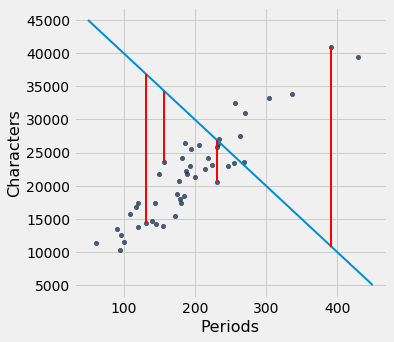

In [55]:
lw_rmse(-100, 50000)

Root mean squared error: 2715.5391063834586


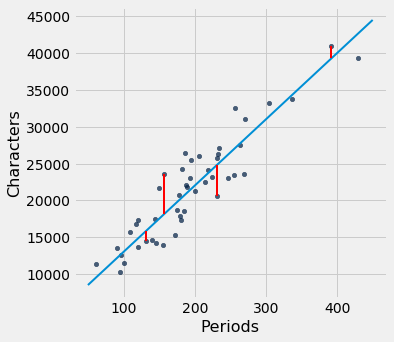

In [56]:
lw_rmse(90, 4000)

Root mean squared error: 2701.690785311856


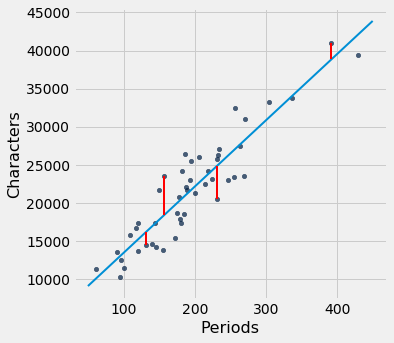

In [57]:
lw_rmse(lw_reg_slope, lw_reg_intercept)

### Numerical Optimization ###

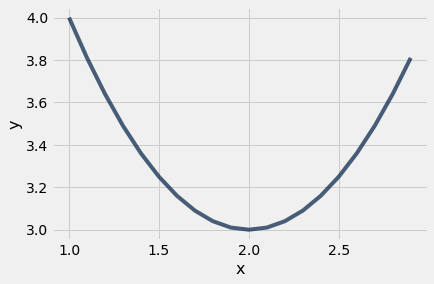

In [58]:
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
Table().with_column('x', x,
                   'y', y).plot('x')

In [59]:
def f(x):
    return ((x-2)**2) + 3

In [60]:
minimize(f)

1.9999999946252267

### Minimizing RMSE ###

In [61]:
def lw_rmse(any_slope, any_intercept):
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

In [62]:
lw_rmse(50, 10000)

4322.167831766537

In [63]:
lw_rmse(-100, 50000)

16710.11983735375

In [64]:
minimize(lw_rmse)

array([  86.97784126, 4744.78481477])

In [65]:
lw_reg_slope, lw_reg_intercept

(86.97784125829821, 4744.784796574928)

### Nonlinear Regression ###

In [66]:
shotput = Table.read_table('shotput.csv')

In [67]:
shotput

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4
61.3,13
63.6,13.2
66.1,13
70,12.7
92.7,13.9
90.5,15.5
90.5,15.8


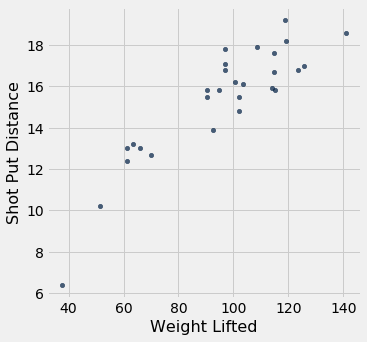

In [68]:
shotput.scatter('Weight Lifted')

In [69]:
def shotput_linear_rmse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = any_slope*x + any_intercept
    return np.mean((y - estimate) ** 2) ** 0.5

In [70]:
best_line = minimize(shotput_linear_rmse)
best_line

array([0.09834382, 5.95962883])

In [71]:
weights = shotput.column(0)

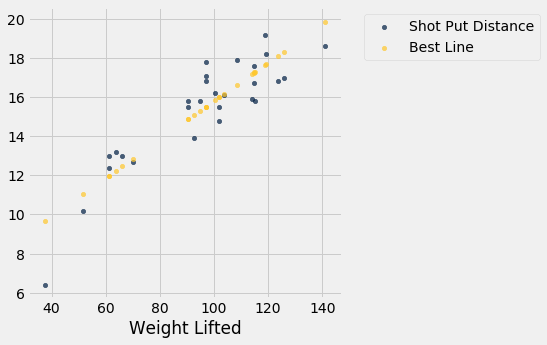

In [72]:
linear_fit = best_line.item(0)*weights + best_line.item(1)

shotput.with_column(
    'Best Line', linear_fit
).scatter(0)

**Quadratic Function**

$$
f(x) ~=~ ax^2 + bx + c
$$
for constants $a$, $b$, and $c$.



In [73]:
def shotput_quadratic_rmse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = a*(x**2) + b*x + c
    return np.mean((y - estimate) ** 2) ** 0.5

In [74]:
best_quad = minimize(shotput_quadratic_rmse)
best_quad

array([-1.04003731e-03,  2.82706003e-01, -1.53167618e+00])

In [75]:
# x = weight lifted = 100 kg
# Then predicted shot put distance:

(-0.00104)*(100**2) + 0.2827*100 - 1.5318

16.3382

In [76]:
quad_fit = best_quad.item(0)*(weights**2) + best_quad.item(1)*weights + best_quad.item(2)

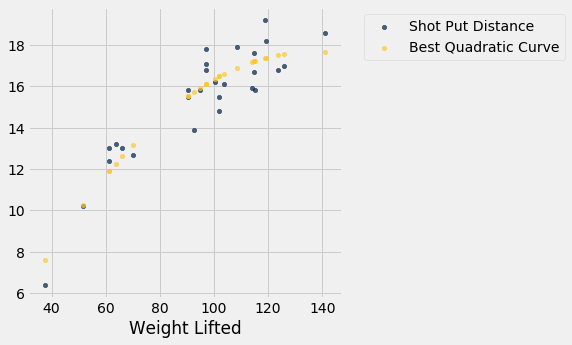

In [77]:
shotput.with_column('Best Quadratic Curve', quad_fit).scatter(0)